In [7]:
#references
# https://pixspy.com/
# https://blog.csdn.net/xufive/article/details/112308533
# https://tw511.com/a/01/36832.html
# https://auzhu.com/sports/1025003.html

In [8]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [9]:
frame_list = os.listdir('data')
print(len(frame_list))
frame_list.sort()

1052


(1080, 1920, 3)


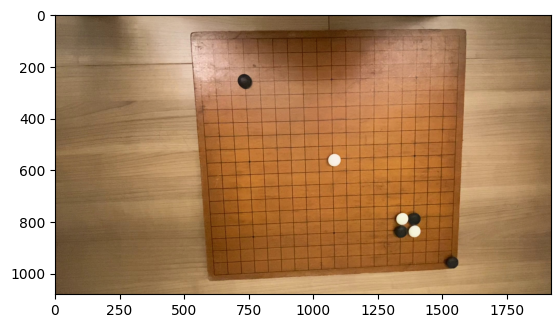

In [10]:
ROOT_PATH = './data'
orig_img = cv2.imread(os.path.join(ROOT_PATH, 'frame1012.jpg'))
print(orig_img.shape)
img_rgb = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB) # 转灰度
img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2GRAY) # 转灰度
img = cv2.GaussianBlur(img, (3,3), 0) # 滤波降噪
img_gray = cv2.Canny(img, 30, 50) # 边缘检测
plt.imshow(img_rgb)
plt.show()

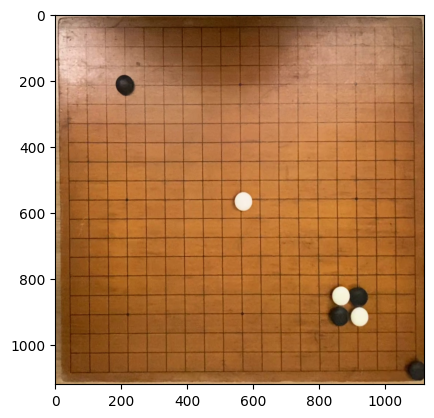

In [11]:
pts1 = np.float32([(10,10), (10,1110), (1110,10), (1110,1110)])
pts2 = np.float32([(523,69),(583,1028),(1588,57),(1544,981)]) 
m = cv2.getPerspectiveTransform(pts2, pts1) 
board_rgb = cv2.warpPerspective(img_rgb, m, (1120, 1120))
board_gray = cv2.warpPerspective(img_gray, m, (1120, 1120))
plt.imshow(board_rgb)
plt.show()


/tmp/ipykernel_57685/3948689597.py:70: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  series = np.linspace(22, 1110, 19, dtype=np.int)
/tmp/ipykernel_57685/3948689597.py:78: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecate

TypeError: 'AxesImage' object is not callable

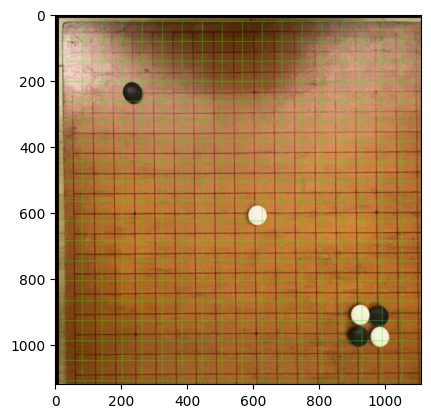

In [12]:
# board_gray = img
circles = cv2.HoughCircles(board_gray, cv2.HOUGH_GRADIENT, 1, 20, param1=90, param2=16, minRadius=10, maxRadius=20) # 圆检测
xs = circles[0,:,0] # 所有棋子的x坐标
ys = circles[0,:,1] # 所有棋子的y坐标
xs.sort()
ys.sort()
k = 1
while xs[k]-xs[:k].mean() < 16:
	k += 1
	
x_min = int(round(xs[:k].mean()))
k = 1
while ys[k]-ys[:k].mean() < 16:
	k += 1
	
y_min = int(round(ys[:k].mean()))
k = -1
while xs[k:].mean() - xs[k-1] < 16:
	k -= 1

x_max = int(round(xs[k:].mean()))
k = -1
while ys[k:].mean() - ys[k-1] < 16:
	k -= 1

y_max = int(round(ys[k:].mean()))

if abs(1120-(x_max-x_min)) < abs(1120-(y_max-y_min)):
	v_min, v_max = x_min, x_max
else:
	v_min, v_max = y_min, y_max

lt = (v_min, v_min) # 棋盘网格左上角
lb = (v_min, v_max) # 棋盘网格左下角
rt = (v_max, v_min) # 棋盘网格右上角
rb = (v_max, v_max) # 棋盘网格右下角
pts1 = np.float32([(10,10), (10,1110), (1110,10), (1110,1110)])  # 棋盘四个角点的最终位置
pts2 = np.float32([lt, lb, rt, rb])
m = cv2.getPerspectiveTransform(pts2, pts1)
# board_gray = cv2.warpPerspective(board_gray, m, (620, 620))
board_bgr = cv2.warpPerspective(board_rgb, m, (1120, 1120))
k = -1
while xs[k:].mean() - xs[k-1] < 16:
	k -= 1

x_max = int(round(xs[k:].mean()))
k = -1
while ys[k:].mean() - ys[k-1] < 16:
	k -= 1

y_max = int(round(ys[k:].mean()))

if abs(1120-(x_max-x_min)) < abs(1120-(y_max-y_min)):
	v_min, v_max = x_min, x_max
else:
	v_min, v_max = y_min, y_max


lt = (v_min, v_min) # 棋盘网格左上角
lb = (v_min, v_max) # 棋盘网格左下角
rt = (v_max, v_min) # 棋盘网格右上角
rb = (v_max, v_max) # 棋盘网格右下角
pts1 = np.float32([(10,10), (10,1110), (1110,10), (1110,1110)])  # 棋盘四个角点的最终位置
pts2 = np.float32([lt, lb, rt, rb])
m = cv2.getPerspectiveTransform(pts2, pts1)
board_gray = cv2.warpPerspective(board_gray, m, (1110, 120))
board_bgr = cv2.warpPerspective(board_bgr, m, (1110, 1120))
plt.imshow(board_bgr)
im = np.copy(board_bgr)
series = np.linspace(22, 1110, 19, dtype=np.int)
for i in series:
	im = cv2.line(im, (22, i), (1110, i), (0,255,0), 1)
	im = cv2.line(im, (i, 22), (i, 1110), (0,255,0), 1)

# cv2.imshow('go', im)_bgr, m, (620, 620))
# cv2.imshow('go', board_gray)
im = np.copy(board_bgr)
series = np.linspace(22, 1110, 19, dtype=np.int)
for i in series:
	im = cv2.line(im, (22, i), (1100, i), (0,255,0), 1)
	im = cv2.line(im, (i, 22), (i, 1110), (0,255,0), 1)

plt.imshow(im)([(10,10), (10,1110), (1110,10), (1110,1110)])  # 棋盘四个角点的最终位置
plt.show()

In [ ]:
def getChar(number):
    factor, moder = divmod(number, 26) # 26 字母个数
    modChar = chr(moder + 65)          # 65 -> 'A'
    if factor != 0:
        modChar = getChar(factor-1) + modChar # factor - 1 : 商为有效值时起始数为 1 而余数是 0
    return modChar
def getChars(length):
    return [getChar(index) for index in range(length)]

In [ ]:
def Heise_zhanbi(img):
    [height, width, tongdao] = img.shape
    #print(width, height, tongdao)
    # cv2.imshow("3", img)
    # cv2.waitKey(20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("binary", gray)
    # cv2.waitKey(100)

    # etVal, threshold = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)
    # # cv2.imshow("threshold", threshold)
    # # cv2.waitKey(200)
    # a = 0
    # b = 0
    # for row in range(height):
    #     for col in range(width):
    #         val = threshold[row][col]
    #         if (val) == 0:#黑色
    #             a = a + 1
    #         else:
    #             b = b + 1

    a = np.sum(gray < 125)
    zhanbi = (float)(a) / (float)(height*width)
    #print("黑色像素个数", a, "黑色像素占比", zhanbi)
    return zhanbi

In [ ]:
def Baise_zhanbi(img):
    [height, width, tongdao] = img.shape
    #print(width, height, tongdao)
    # cv2.imshow("3", img)
    # cv2.waitKey(20)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # cv2.imshow("binary", gray)
    # cv2.waitKey(100)

    # etVal, threshold = cv2.threshold(gray, 235, 255, cv2.THRESH_BINARY)
    # # cv2.imshow("threshold", threshold)
    # # cv2.waitKey(200)
    # a = 0
    # b = 0
    # for row in range(height):
    #     for col in range(width):
    #         val = threshold[row][col]
    #         if (val) == 0:#黑色
    #             a = a + 1
    #         else:
    #             b = b + 1
    b=np.sum(gray>235)
    zhanbi = (float)(b) / (float)(height*width)
    #print("白色像素个数", b, "白色像素占比", zhanbi)
    return zhanbi

In [ ]:
def dingweiqizi_weizhi(img):
    '''********************************************
    1、定位棋盘位置
    ********************************************'''
    #img = cv2.imread("./screen/1.jpg")

    image = img.copy()
    w, h, c = img.shape
    img2 = np.zeros((w, h, c), np.uint8)
    img3 = np.zeros((w, h, c), np.uint8)
    # img = ImageGrab.grab() #bbox specifies specific region (bbox= x,y,width,height *starts top-left)

    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower = np.array([10, 0, 0])
    upper = np.array([40, 255, 255])
    mask = cv2.inRange(hsv, lower, upper)
    erodeim = cv2.erode(mask, None, iterations=2)  # 腐蚀
    dilateim = cv2.dilate(erodeim, None, iterations=2)

    img = cv2.bitwise_and(img, img, mask=dilateim)
    frame = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, dst = cv2.threshold(frame, 100, 255, cv2.THRESH_BINARY)
    contours, hierarchy = cv2.findContours(dst, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)



    #cv2.imshow("0", img)

    i = 0
    maxarea = 0
    nextarea = 0
    maxint = 0
    for c in contours:
        if cv2.contourArea(c) > maxarea:
            maxarea = cv2.contourArea(c)
            maxint = i
        i += 1

    # 多边形拟合
    epsilon = 0.02 * cv2.arcLength(contours[maxint], True)
    if epsilon < 1:
        print("error :   epsilon < 1")
        pass

    # 多边形拟合
    approx = cv2.approxPolyDP(contours[maxint], epsilon, True)
    [[x1, y1]] = approx[0]
    [[x2, y2]] = approx[2]

    checkerboard = image[y1:y2, x1:x2]
    # cv2.imshow("1", checkerboard)
    # cv2.waitKey(1000)
    #cv2.destroyAllWindows()
    return checkerboard

In [ ]:
def dingweiqizi_yanse_weizhi(img):
    '''********************************************
    2、识别棋盘棋子位置及颜色及序号；
    ********************************************'''
    #img = cv2.imread("./checkerboard/checkerboard_1.jpg")
    img = cv2.resize(img, (724,724), interpolation=cv2.INTER_AREA)
    #cv2.imshow("src",img)
    #cv2.waitKey(1000)

    #变量定义
    small_length=38  #每个小格宽高
    qizi_zhijing=38#棋子直径
    zuoshangjiao=20#棋盘四周的宽度

    list = [[0 for i in range(19)] for j in range(19)]
    #print(list)

    for i in range(19):
        for j in range(19):

            lie = i
            hang = j

            Tp_x = small_length * lie
            Tp_y = small_length * hang
            Tp_width = qizi_zhijing
            Tp_height = qizi_zhijing

            img_temp=img[Tp_y:Tp_y+Tp_height, Tp_x:Tp_x+Tp_width]#参数含义分别是：y、y+h、x、x+w

            heise_zhanbi=Heise_zhanbi(img_temp)
            if heise_zhanbi>0.5:
                list[hang][lie]=2#黑色
                #print("当前棋子为黑色")
            else:
                baise_zhanbi = Baise_zhanbi(img_temp)
                if baise_zhanbi > 0.15:
                    list[hang][lie] = 1  # 黑色
                    #print("当前棋子为白色")
                else:
                    list[hang][lie] = 0  # 黑色
                    #print("当前位置没有棋子")
            #print(heise_zhanbi)
    #cv2.imshow("2",img)
    #print("\n")
    #print(list)
    return  list

In [ ]:
def biaozhunhuashuchu(list0,list1,list2,connter):
    a_array = np.array(list0)
    b_array = np.array(list1)
    d_array = b_array-a_array

    for i in range(19):
        for j in range(19):
            if d_array[i][j]>1:
                #pass
                print("第",i,"行，第",j,"列棋子为黑色：",i,j)
                A = getChars(i + 1)
                B = getChars(j + 1)
                str0 = str(connter) + str(A[i]) + str(B[j])
                #print(str0)
                list2.append(str0)
            elif d_array[i][j]>0:
                #pass
                print("第", i, "行，第", j, "列棋子为白色：", i, j)
                A = getChars(i+1)
                B = getChars(j+1)
                str0 = str(connter) + str(A[i]) + str(B[j])
                #print(str0)
                list2.append(str0)

    return list2

In [ ]:
list0 = [[0 for i in range(19)] for j in range(19)]
list_finall = []
# imglist = sorted(glob("screen/*.jpg"))
connter = 0
# for i in imglist:
#img = cv2.imread("./screen/8.jpg")
img = cv2.imread('./data/frame101.jpg')
'''********************************************
1、定位棋盘位置
********************************************'''
img_after=dingweiqizi_weizhi(img)
#cv2.imshow("src",img)

'''********************************************
2、识别棋盘棋子位置及颜色及序号；
********************************************'''
list1=dingweiqizi_yanse_weizhi(img_after)

'''********************************************
3、标准化输出
********************************************'''
connter=connter+1
list_finall=biaozhunhuashuchu(list0,list1,list_finall,connter)
list0=list1
print(list_finall)